In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pdfplumber
import re
import altair as alt

In [2]:
with pdfplumber.open("Invoice.pdf") as pdf_file:
    
    '''List containing each pages text data as one entry'''
    pdf_text_list_by_page = []
    
    '''Loop through every page of the pdf file'''    
    for i in range(0, len(pdf_file.pages)): 
        # pdf_file.pages is a list containing individual page data as page objects in each list entry
        
        '''Extract the text from each pdf page into the list'''
        page_data = pdf_file.pages[i]
        pdf_text_list_by_page.append(page_data.extract_text())

In [3]:
All_Entries = []
Incidentals = []
for i in range(0,len(pdf_text_list_by_page)):
    text_list = pdf_text_list_by_page[i].split('\n') # split lines using \n escape char
    All_Entries.extend(text_list)
    Ientries = [e for e in text_list if "Incid" in e]
    Incidentals = Incidentals + Ientries

# Pop the clauses from the list of incidentals
Clauses = [e for e in Incidentals if not any(c.isdigit() for c in e)]
Fees = [e for e in Incidentals if any(c.isdigit() for c in e)]

In [4]:
def fees_list_to_df(Fees):
    dict_list = []
    for i in range(0,len(Fees)):
        '''
        Create categories and text field fillings
        Convert the text values from fees list into dict
        The dictionary will be used to make a pandas df
        '''

        # Create some categories
        fee_cats = Fees[i].split(' ')[1].split(':')

        # Extract Actual Fee itself
        # fee = re.findall("\d+\.\d+", Fees[i])
        fee = float(Fees[i].split('$')[1].strip(' '))

        # Extract fee description
        desc = Fees[i].strip('Incid. ')
        for cat_num in range(0,len(fee_cats)):
            desc = desc.strip(fee_cats[cat_num])
        desc = desc.split('$')[0].strip(' ').strip(':') # 1st (0) entry is description


        '''Now we can construct the dictionary'''
        my_dict = {}
        
        # Extract category fields
        for cat_num in range(0,len(fee_cats)):
            my_dict["Category " + str(cat_num)] = fee_cats[cat_num]
        
        my_dict["Fees"] = fee
        my_dict["Description"] = desc

        '''Append dicts to list to construct df later'''
        dict_list.append(my_dict)


    '''Construct df out of list of dicts'''
    df = pd.DataFrame(dict_list)
    return df

df = fees_list_to_df(Fees=Fees)

In [5]:
# sns.set(style='whitegrid', context='talk')
# ax = sns.barplot(data=df.Fees)
# Set up the matplotlib figure


In [6]:
def generate_breakdown_df(df,category='Category 1'):
    df = df[[category,'Fees']]
    cats = df[category].unique()
    breakdown_df = None
    my_dict = {}

    for cat in cats:
        fee_total = df.loc[df[category] == cat, 'Fees'].sum()
        fee_total = round(fee_total,2)
        # print('You pay $' + str(fee_total) + ' towards ' + str(cat))

        my_dict[str(cat)] = fee_total

  
    breakdown_df = pd.DataFrame([my_dict])
    breakdown_df = breakdown_df.T
    breakdown_df = breakdown_df.rename(columns={0:'Fees'})

    return breakdown_df

In [7]:
def groupcats(df,listcats,category):
    # listcats is a dictionary, where the key is a string of the new category,
    # the value is a list of strings of the old categories to be grouped
    # listcats = {'Engineering':['Eng.', 'Engineering', 'ES']}

    for i in listcats:
        NewName = i
        list_replace = listcats[i]
        for j in range(0, len(list_replace)):
            OldName = list_replace[j]
            df = df.replace(to_replace=OldName, value=NewName)
    
    return df

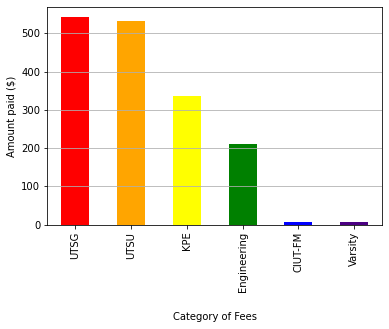

In [35]:
grouped = groupcats(df=df,listcats={'Engineering':['Eng.', 'Engineering', 'ES']},category='Category 1')
grouped_bd = generate_breakdown_df(df=grouped, category='Category 1')

grouped_bd = grouped_bd.sort_values(by='Fees', ascending=False)
ax = grouped_bd.plot.bar(y='Fees', color=['red','orange','yellow','green','blue','indigo'])
ax.get_legend().remove()
plt.grid(False) # Need to remove existing grid
plt.grid(True,which='major',axis='y')
plt.xlabel('Category of Fees', labelpad=20)
plt.ylabel('Amount paid ($)')
plt.colormaps='jet'
plt.show(ax)

['UTSG', 'UTSU', 'KPE', 'Engineering', 'CIUT-FM', 'Varsity']

In [36]:
grouped_bd['Index'] = grouped_bd.index
alt.Chart(grouped_bd).mark_bar().encode(
    x = 'Index',
    y = 'Fees'
)

alt.Chart(...)

In [9]:
# Show breakdown by category
# Do a weighted calculation, to show what services I benefit from
# Show what fraction of what i pay for i get

In [10]:
 # Create some categories
fee_cats = Fees[i].split(' ')[i].split(':')

# Extract Actual Fee itself
fee = re.findall("\d+\.\d+", Fees[i])\

# Extract fee description
desc = Fees[0].strip('Incid. ')
for i in range(0,len(fee_cats)):
    desc = desc.strip(fee_cats[i])
desc = desc.split('$')[0].strip(' ').strip(':')


''' Now we can construct the dictionary'''
my_dict = {}
    
# Extract category fields
for cat_num in range(0,len(fee_cats)):
    my_dict["Category " + str(cat_num)] = fee_cats[cat_num]
    
my_dict["Fees"] = fee
my_dict["Description"] = desc

pd.DataFrame.from_dict(my_dict)

,Category 0,Fees,Description
0,Health,81.47,"Univ.Serv:KPE Co-curr. Prg, Srv&Fac-FT"
